# Set up

In [57]:
# update path with data dir
import sys
sys.path.append('../../data/')

In [58]:
import warnings
# warnings.filterwarnings('ignore')

In [59]:
import pandas as pd
import patsy
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFECV
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Getting data

In [60]:
file_name = '../csvs/element_gameweek_features_v05.csv'

In [61]:
element_gameweek_df = pd.read_csv(file_name)

In [62]:
current_event = 20

In [63]:
element_gameweek_df =\
element_gameweek_df[
    (element_gameweek_df['event'] <= current_event)
]

In [64]:
element_gameweek_df.fillna(3, inplace=True)

In [65]:
element_gameweek_df = element_gameweek_df[element_gameweek_df['rolling_avg_minutes_element_p3'] >= 60]

# Modelling data

## Splitting data

In [11]:
last_train_event = 15

In [12]:
test_fold = [-1 if i <= last_train_event else 0 for i in element_gameweek_df['event']]
ps = PredefinedSplit(test_fold)

In [13]:
for train_index, test_index in ps.split():
    element_gameweek_df_train, element_gameweek_df_test = \
    element_gameweek_df.copy().iloc[train_index], element_gameweek_df.copy().iloc[test_index]

## Building model

In [93]:
formula = \
'total_points ~ C(element) + C(element_type) + C(team) + C(opposition_team) + ' + \
' + '.join([i for i in element_gameweek_df.columns if i not in
 [
     'safe_web_name',
     'element',
     'event',
     'fixture',
     'team',
     'opposition_team',
     'element_type',
     'minutes',
     'rolling_value_points',
     'total_points',
     'rolling_avg_total_points_against_opposition_team_element_type_home',
     'rolling_avg_total_points_against_opposition_team_element_type_away'
 ]])

In [94]:
print(formula)

total_points ~ C(element) + C(element_type) + C(team) + C(opposition_team) + was_home + is_sunday + is_weekday + is_early + is_late + value + rolling_avg_total_points_element + rolling_max_total_points_element + has_high_points_ever_element + rolling_avg_bps_element + rolling_avg_bonus_element + rolling_avg_goals_scored_element + rolling_avg_minutes_element + rolling_avg_clean_sheets_element + rolling_avg_completed_passes_element + rolling_avg_recoveries_element + rolling_avg_assists_element + rolling_avg_key_passes_element + rolling_avg_winning_goals_element + rolling_avg_tackled_element + rolling_avg_dribbles_element + rolling_avg_clearances_blocks_interceptions_element + rolling_avg_big_chances_created_element + rolling_avg_target_missed_element + rolling_avg_fouls_element + rolling_avg_tackles_element + rolling_avg_open_play_crosses_element + rolling_avg_offside_element + rolling_avg_big_chances_missed_element + rolling_avg_saves_element + rolling_avg_goals_conceded_element + rolli

In [95]:
y, X = patsy.dmatrices(formula, element_gameweek_df, return_type='matrix')

In [96]:
for train_index, test_index in ps.split():
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [97]:
n_features = X.shape[1]

## Selecting features

In [103]:
estimator = GradientBoostingRegressor(n_estimators=50,
                                      max_features=0.7,
                                      min_samples_leaf=0.015,
                                      learning_rate=0.03,
                                      criterion='mse',
                                      random_state=0)
selector = RFECV(estimator, step=1,
                 scoring='neg_mean_squared_error',
                 cv=ps, n_jobs=1, verbose=1)
selector.fit(X, y.ravel())

Fitting estimator with 439 features.
Fitting estimator with 438 features.
Fitting estimator with 437 features.
Fitting estimator with 436 features.
Fitting estimator with 435 features.
Fitting estimator with 434 features.
Fitting estimator with 433 features.
Fitting estimator with 432 features.
Fitting estimator with 431 features.
Fitting estimator with 430 features.
Fitting estimator with 429 features.
Fitting estimator with 428 features.
Fitting estimator with 427 features.
Fitting estimator with 426 features.
Fitting estimator with 425 features.
Fitting estimator with 424 features.
Fitting estimator with 423 features.
Fitting estimator with 422 features.
Fitting estimator with 421 features.
Fitting estimator with 420 features.
Fitting estimator with 419 features.
Fitting estimator with 418 features.
Fitting estimator with 417 features.
Fitting estimator with 416 features.
Fitting estimator with 415 features.
Fitting estimator with 414 features.
Fitting estimator with 413 features.
F

Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
F

Fitting estimator with 430 features.
Fitting estimator with 429 features.
Fitting estimator with 428 features.
Fitting estimator with 427 features.
Fitting estimator with 426 features.
Fitting estimator with 425 features.
Fitting estimator with 424 features.
Fitting estimator with 423 features.
Fitting estimator with 422 features.
Fitting estimator with 421 features.
Fitting estimator with 420 features.
Fitting estimator with 419 features.
Fitting estimator with 418 features.
Fitting estimator with 417 features.
Fitting estimator with 416 features.
Fitting estimator with 415 features.
Fitting estimator with 414 features.
Fitting estimator with 413 features.
Fitting estimator with 412 features.
Fitting estimator with 411 features.
Fitting estimator with 410 features.
Fitting estimator with 409 features.
Fitting estimator with 408 features.
Fitting estimator with 407 features.
Fitting estimator with 406 features.
Fitting estimator with 405 features.
Fitting estimator with 404 features.
F

RFECV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
      estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                                          learning_rate=0.03, loss='ls',
                                          max_depth=3, max_features=0.7,
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=0.015,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=50,
                                          n_iter_no_change=None, presort='auto',
                                          random_state=0, subsample=1.0,
                                          tol=0.0001, validation_fraction=0.1,
               

In [104]:
features = patsy.dmatrices(formula, element_gameweek_df, return_type='dataframe')[1].columns
selected_features = pd.Series(features)[selector.support_]
print(len(list(selected_features)))
list(selected_features)

271


['C(element)[T.262]',
 'C(element)[T.263]',
 'C(element)[T.264]',
 'C(element)[T.265]',
 'C(element)[T.267]',
 'C(element)[T.268]',
 'C(element)[T.269]',
 'C(element)[T.270]',
 'C(element)[T.271]',
 'C(element)[T.272]',
 'C(element)[T.274]',
 'C(element)[T.275]',
 'C(element)[T.276]',
 'C(element)[T.280]',
 'C(element)[T.281]',
 'C(element)[T.282]',
 'C(element)[T.284]',
 'C(element)[T.285]',
 'C(element)[T.286]',
 'C(element)[T.288]',
 'C(element)[T.289]',
 'C(element)[T.291]',
 'C(element)[T.292]',
 'C(element)[T.293]',
 'C(element)[T.294]',
 'C(element)[T.295]',
 'C(element)[T.296]',
 'C(element)[T.297]',
 'C(element)[T.298]',
 'C(element)[T.299]',
 'C(element)[T.300]',
 'C(element)[T.301]',
 'C(element)[T.302]',
 'C(element)[T.304]',
 'C(element)[T.305]',
 'C(element)[T.306]',
 'C(element)[T.309]',
 'C(element)[T.310]',
 'C(element)[T.311]',
 'C(element)[T.312]',
 'C(element)[T.313]',
 'C(element)[T.315]',
 'C(element)[T.317]',
 'C(element)[T.318]',
 'C(element)[T.319]',
 'C(elemen

In [83]:
stark_X_sel = X[:,selector.support_]
stark_X_train_sel = X_train[:,selector.support_]
stark_X_test_sel = X_test[:,selector.support_]

In [98]:
lush_X_sel = X
lush_X_train_sel = X_train
lush_X_test_sel = X_test

## Tuning model

### GP tuner

#### Gradient boosted trees (lush)

In [109]:
lush_space = [
    Integer(1, 200, name='n_estimators'),
    Real(0.1, 1.0, 'uniform', name='max_features'),
    Real(0.01, 0.1, 'uniform', name='min_samples_leaf'),
    Real(0.01, 0.075, 'log-uniform', name='learning_rate'),
]

In [110]:
lush_gp_model = GradientBoostingRegressor(criterion='mse')

@use_named_args(lush_space)
def lush_objective(**params):
    lush_gp_model.set_params(**params)

    return -np.mean(
        cross_val_score(
            lush_gp_model,
            lush_X_sel, y.ravel(),
            cv=ps,
            n_jobs=1,
            scoring="neg_mean_squared_error"))

In [ ]:
lush_res_gp_arr = []
for i in range(1, 11):
    print('minimisation iteration', i)
    lush_res_gp = gp_minimize(lush_objective, lush_space, n_calls=50, verbose=2)
    lush_res_gp_arr.append(lush_res_gp)

minimisation iteration 1
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0064
Function value obtained: 9.6472
Current minimum: 9.6472
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.3591
Function value obtained: 10.0772
Current minimum: 9.6472
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 5.0408
Function value obtained: 9.5363
Current minimum: 9.5363
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 3.0999
Function value obtained: 9.5971
Current minimum: 9.5363
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.2738
Function value obtained: 9.5710
Current minimum: 9.5363
Iteration

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 2.1099
Function value obtained: 9.4701
Current minimum: 9.4207
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 6.0615
Function value obtained: 9.5793
Current minimum: 9.4207
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 1.8029
Function value obtained: 9.4405
Current minimum: 9.4207
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 1.7649
Function value obtained: 9.4632
Current minimum: 9.4207
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 3.6960
Function value obtained: 9.5185
Current minimum: 9.4207
Iteration No: 46 started. Sea

Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 1.6398
Function value obtained: 9.4746
Current minimum: 9.4236
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 1.1951
Function value obtained: 9.4466
Current minimum: 9.4236
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 1.5811
Function value obtained: 9.5405
Current minimum: 9.4236
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 1.6810
Function value obtained: 9.4744
Current minimum: 9.4236
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 1.8683
Function value obtained: 9.5128
Current minimum: 9.4236
Iteration No: 37 started. Sea

Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 2.1846
Function value obtained: 9.4946
Current minimum: 9.4592
Iteration No: 24 started. Searching for the next optimal point.
Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 3.0748
Function value obtained: 9.5275
Current minimum: 9.4592
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 2.0703
Function value obtained: 9.5067
Current minimum: 9.4592
Iteration No: 26 started. Searching for the next optimal point.
Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 2.2101
Function value obtained: 9.5121
Current minimum: 9.4592
Iteration No: 27 started. Searching for the next optimal point.
Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.7375
Function value obtained: 9.5361
Current minimum: 9.4592
Iteration No: 28 started. Sea

Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 5.5475
Function value obtained: 9.4814
Current minimum: 9.4263
Iteration No: 15 started. Searching for the next optimal point.
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 3.6548
Function value obtained: 9.5097
Current minimum: 9.4263
Iteration No: 16 started. Searching for the next optimal point.
Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 3.4414
Function value obtained: 9.4452
Current minimum: 9.4263
Iteration No: 17 started. Searching for the next optimal point.
Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 1.7281
Function value obtained: 9.4760
Current minimum: 9.4263
Iteration No: 18 started. Searching for the next optimal point.
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 4.3704
Function value obtained: 9.5127
Current minimum: 9.4263
Iteration No: 19 started. Sea

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.8123
Function value obtained: 9.5346
Current minimum: 9.4689
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 2.1875
Function value obtained: 9.6235
Current minimum: 9.4689
Iteration No: 6 started. Evaluating function at random point.
Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.4727
Function value obtained: 10.0263
Current minimum: 9.4689
Iteration No: 7 started. Evaluating function at random point.
Iteration No: 7 ended. Evaluation done at random point.
Time taken: 1.0622
Function value obtained: 9.4757
Current minimum: 9.4689
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluation done at random point.
Time taken: 1.9936
Function value obtained: 9.4953
Current minimum: 9.4689
Iteration No: 9 started. Evaluating function at random point.
Iteration No: 9 ended. Evaluation 

Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 2.1652
Function value obtained: 9.4940
Current minimum: 9.4565
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 1.9790
Function value obtained: 9.4966
Current minimum: 9.4565
Iteration No: 47 started. Searching for the next optimal point.
Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 1.5886
Function value obtained: 9.4627
Current minimum: 9.4565
Iteration No: 48 started. Searching for the next optimal point.
Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 2.0137
Function value obtained: 9.4470
Current minimum: 9.4470
Iteration No: 49 started. Searching for the next optimal point.
Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 1.6934
Function value obtained: 9.5658
Current minimum: 9.4470
Iteration No: 50 started. Sea

Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 5.8989
Function value obtained: 9.4707
Current minimum: 9.4112
Iteration No: 37 started. Searching for the next optimal point.
Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 7.1119
Function value obtained: 9.4392
Current minimum: 9.4112
Iteration No: 38 started. Searching for the next optimal point.
Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 1.7574
Function value obtained: 9.4911
Current minimum: 9.4112
Iteration No: 39 started. Searching for the next optimal point.
Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 3.7360
Function value obtained: 9.4190
Current minimum: 9.4112
Iteration No: 40 started. Searching for the next optimal point.
Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 2.2744
Function value obtained: 9.7688
Current minimum: 9.4112
Iteration No: 41 started. Sea

Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 2.1933
Function value obtained: 9.4897
Current minimum: 9.4339
Iteration No: 28 started. Searching for the next optimal point.
Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 2.4103
Function value obtained: 9.5014
Current minimum: 9.4339
Iteration No: 29 started. Searching for the next optimal point.
Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 4.4903
Function value obtained: 9.4932
Current minimum: 9.4339
Iteration No: 30 started. Searching for the next optimal point.
Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 3.2244
Function value obtained: 9.4584
Current minimum: 9.4339
Iteration No: 31 started. Searching for the next optimal point.
Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 1.1173
Function value obtained: 10.3245
Current minimum: 9.4339
Iteration No: 32 started. Se

Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 2.5501
Function value obtained: 10.0128
Current minimum: 9.4396
Iteration No: 19 started. Searching for the next optimal point.
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 2.4174
Function value obtained: 9.5419
Current minimum: 9.4396
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 1.3166
Function value obtained: 9.5152
Current minimum: 9.4396
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 4.9000
Function value obtained: 9.5115
Current minimum: 9.4396
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.4346
Function value obtained: 9.5241
Current minimum: 9.4396
Iteration No: 23 started. Se

Iteration No: 8 ended. Evaluation done at random point.
Time taken: 2.6623
Function value obtained: 9.4731
Current minimum: 9.4034
Iteration No: 9 started. Evaluating function at random point.
Iteration No: 9 ended. Evaluation done at random point.
Time taken: 1.9256
Function value obtained: 9.6211
Current minimum: 9.4034
Iteration No: 10 started. Evaluating function at random point.
Iteration No: 10 ended. Evaluation done at random point.
Time taken: 3.7779
Function value obtained: 9.4375
Current minimum: 9.4034
Iteration No: 11 started. Searching for the next optimal point.
Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 4.0485
Function value obtained: 9.4256
Current minimum: 9.4034
Iteration No: 12 started. Searching for the next optimal point.
Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 3.0740
Function value obtained: 9.4886
Current minimum: 9.4034
Iteration No: 13 started. Searching for the next optimal point.
Ite

Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 5.1288
Function value obtained: 9.5615
Current minimum: 9.4034
Iteration No: 49 started. Searching for the next optimal point.
Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 2.0481
Function value obtained: 9.4988
Current minimum: 9.4034
Iteration No: 50 started. Searching for the next optimal point.
Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 1.7504
Function value obtained: 9.4582
Current minimum: 9.4034
minimisation iteration 10
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.7411
Function value obtained: 9.6014
Current minimum: 9.6014
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.4208
Function value obtained: 9.4761
Current minimum: 9.4761
Iteration No: 3 started. Evalua

In [ ]:
for i in lush_res_gp_arr:
    print(i.fun)
print('\n')
for i in lush_res_gp_arr:
    print(i.x)

high 30s low 40s

#### Gradient boosted trees (stark)

In [89]:
stark_space = [
    Integer(1, 200, name='n_estimators'),
    Real(0.01, 1.0, 'uniform', name='max_features'),
    Real(0.001, 0.1, 'log-uniform', name='min_samples_leaf'),
    Real(0.001, 0.1, 'log-uniform', name='learning_rate'),
]

In [90]:
stark_gp_model = GradientBoostingRegressor(criterion='mse')

@use_named_args(stark_space)
def stark_objective(**params):
    stark_gp_model.set_params(**params)

    return -np.mean(
        cross_val_score(
            stark_gp_model,
            stark_X_sel, y.ravel(),
            cv=ps,
            n_jobs=1,
            scoring="neg_mean_squared_error"))

In [ ]:
stark_res_gp_arr = []
for i in range(1, 11):
    print('minimisation iteration', i)
    stark_res_gp = gp_minimize(stark_objective, stark_space, n_calls=50, verbose=2)
    stark_res_gp_arr.append(stark_res_gp)

minimisation iteration 1
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1597
Function value obtained: 9.8433
Current minimum: 9.8433
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1145
Function value obtained: 10.2040
Current minimum: 9.8433
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0996
Function value obtained: 10.2891
Current minimum: 9.8433
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1333
Function value obtained: 9.4053
Current minimum: 9.4053
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1395
Function value obtained: 10.0061
Current minimum: 9.4053
Iterati

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 2.6082
Function value obtained: 9.3691
Current minimum: 9.3189
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 2.3042
Function value obtained: 9.3794
Current minimum: 9.3189
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 2.0202
Function value obtained: 9.3913
Current minimum: 9.3189
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 2.4872
Function value obtained: 9.4123
Current minimum: 9.3189
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 2.7156
Function value obtained: 9.3933
Current minimum: 9.3189
Iteration No: 46 started. Sea

Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 1.9995
Function value obtained: 9.3606
Current minimum: 9.3242
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 1.8328
Function value obtained: 9.3437
Current minimum: 9.3242
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 1.9384
Function value obtained: 9.4131
Current minimum: 9.3242
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 2.5462
Function value obtained: 9.3246
Current minimum: 9.3242
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 1.6871
Function value obtained: 9.3923
Current minimum: 9.3242
Iteration No: 37 started. Sea

Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 2.6121
Function value obtained: 9.4046
Current minimum: 9.2983
Iteration No: 24 started. Searching for the next optimal point.
Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 2.7125
Function value obtained: 9.4346
Current minimum: 9.2983
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 2.8401
Function value obtained: 9.5221
Current minimum: 9.2983
Iteration No: 26 started. Searching for the next optimal point.
Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 3.0728
Function value obtained: 9.4183
Current minimum: 9.2983
Iteration No: 27 started. Searching for the next optimal point.
Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 2.3925
Function value obtained: 10.2346
Current minimum: 9.2983
Iteration No: 28 started. Se

Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 1.6068
Function value obtained: 10.3049
Current minimum: 9.3533
Iteration No: 15 started. Searching for the next optimal point.
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 2.2473
Function value obtained: 9.2935
Current minimum: 9.2935
Iteration No: 16 started. Searching for the next optimal point.
Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 1.8733
Function value obtained: 9.4124
Current minimum: 9.2935
Iteration No: 17 started. Searching for the next optimal point.
Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 2.3299
Function value obtained: 9.3285
Current minimum: 9.2935
Iteration No: 18 started. Searching for the next optimal point.
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 1.5776
Function value obtained: 9.3649
Current minimum: 9.2935
Iteration No: 19 started. Se

Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.2322
Function value obtained: 9.4350
Current minimum: 9.4350
Iteration No: 6 started. Evaluating function at random point.
Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.2781
Function value obtained: 9.9874
Current minimum: 9.4350
Iteration No: 7 started. Evaluating function at random point.
Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.1230
Function value obtained: 9.9996
Current minimum: 9.4350
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.0535
Function value obtained: 10.1988
Current minimum: 9.4350
Iteration No: 9 started. Evaluating function at random point.
Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.1131
Function value obtained: 9.3700
Current minimum: 9.3700
Iteration No: 10 started. Evaluating function at random point.
Iteration No: 10 ended. Evaluatio

Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 2.4426
Function value obtained: 9.3602
Current minimum: 9.3003
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 2.0780
Function value obtained: 9.4029
Current minimum: 9.3003
Iteration No: 47 started. Searching for the next optimal point.
Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 2.4206
Function value obtained: 9.3518
Current minimum: 9.3003
Iteration No: 48 started. Searching for the next optimal point.
Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 1.7551
Function value obtained: 9.3788
Current minimum: 9.3003
Iteration No: 49 started. Searching for the next optimal point.
Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 1.8339
Function value obtained: 9.5166
Current minimum: 9.3003
Iteration No: 50 started. Sea

Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 2.3174
Function value obtained: 9.4031
Current minimum: 9.3386
Iteration No: 37 started. Searching for the next optimal point.
Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 2.2128
Function value obtained: 9.3879
Current minimum: 9.3386
Iteration No: 38 started. Searching for the next optimal point.
Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 1.8203
Function value obtained: 9.4288
Current minimum: 9.3386
Iteration No: 39 started. Searching for the next optimal point.
Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 3.4750
Function value obtained: 9.3769
Current minimum: 9.3386
Iteration No: 40 started. Searching for the next optimal point.
Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 2.5620
Function value obtained: 9.4253
Current minimum: 9.3386
Iteration No: 41 started. Sea

Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.9208
Function value obtained: 9.5220
Current minimum: 9.3440
Iteration No: 28 started. Searching for the next optimal point.
Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 2.0419
Function value obtained: 9.3301
Current minimum: 9.3301
Iteration No: 29 started. Searching for the next optimal point.
Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 2.8165
Function value obtained: 9.3075
Current minimum: 9.3075
Iteration No: 30 started. Searching for the next optimal point.
Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.5695
Function value obtained: 9.3718
Current minimum: 9.3075
Iteration No: 31 started. Searching for the next optimal point.
Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 2.0893
Function value obtained: 9.3938
Current minimum: 9.3075
Iteration No: 32 started. Sea

Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 1.8882
Function value obtained: 9.4007
Current minimum: 9.3726
Iteration No: 19 started. Searching for the next optimal point.
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 2.1369
Function value obtained: 10.2580
Current minimum: 9.3726
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 3.1290
Function value obtained: 9.4759
Current minimum: 9.3726
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 3.9531
Function value obtained: 9.5578
Current minimum: 9.3726
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 2.4595
Function value obtained: 9.4900
Current minimum: 9.3726
Iteration No: 23 started. Se

Iteration No: 10 ended. Evaluation done at random point.
Time taken: 1.4752
Function value obtained: 9.3658
Current minimum: 9.3658
Iteration No: 11 started. Searching for the next optimal point.
Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 1.5581
Function value obtained: 9.3941
Current minimum: 9.3658
Iteration No: 12 started. Searching for the next optimal point.
Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 1.3879
Function value obtained: 9.3858
Current minimum: 9.3658
Iteration No: 13 started. Searching for the next optimal point.
Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 1.0215
Function value obtained: 9.4381
Current minimum: 9.3658
Iteration No: 14 started. Searching for the next optimal point.
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.8781
Function value obtained: 10.4092
Current minimum: 9.3658
Iteration No: 15 started. Searching for

Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 5.3230
Function value obtained: 9.3505
Current minimum: 9.2866
minimisation iteration 10
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2745
Function value obtained: 10.0991
Current minimum: 10.0991
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0600
Function value obtained: 10.3378
Current minimum: 10.0991
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4227
Function value obtained: 9.4306
Current minimum: 9.4306
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1433
Function value obtained: 10.0551
Current minimum: 9.4306
Iteration No: 5 started. Evaluating function at random

In [ ]:
for i in stark_res_gp_arr:
    print(i.fun)
print('\n')
for i in stark_res_gp_arr:
    print(i.x)

### Grid search

#### Gradient boosted trees (lush)

In [53]:
max_features_lush = [0.21, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
min_samples_leaf_lush = [0.0225, 0.025, 0.0275]
learning_rate_lush = [0.025, 0.03, 0.035]

parameters_lush = {
    'max_features': max_features_lush,
    'min_samples_leaf': min_samples_leaf_lush,
    'learning_rate': learning_rate_lush
}

In [54]:
gs_model_lush = GridSearchCV(
    GradientBoostingRegressor(n_estimators=120,
                              criterion='mse'),
    parameters_lush,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit=False,
    cv=ps,
    error_score=100, n_jobs=1, verbose=2)
gs_model_lush.fit(lush_X_sel, y.ravel())

Fitting 1 folds for each of 81 candidates, totalling 81 fits
[CV] learning_rate=0.025, max_features=0.21, min_samples_leaf=0.0225 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.025, max_features=0.21, min_samples_leaf=0.0225, total=   1.0s
[CV] learning_rate=0.025, max_features=0.21, min_samples_leaf=0.025 ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  learning_rate=0.025, max_features=0.21, min_samples_leaf=0.025, total=   0.8s
[CV] learning_rate=0.025, max_features=0.21, min_samples_leaf=0.0275 .
[CV]  learning_rate=0.025, max_features=0.21, min_samples_leaf=0.0275, total=   0.8s
[CV] learning_rate=0.025, max_features=0.2, min_samples_leaf=0.0225 ..
[CV]  learning_rate=0.025, max_features=0.2, min_samples_leaf=0.0225, total=   0.8s
[CV] learning_rate=0.025, max_features=0.2, min_samples_leaf=0.025 ...
[CV]  learning_rate=0.025, max_features=0.2, min_samples_leaf=0.025, total=   0.8s
[CV] learning_rate=0.025, max_features=0.2, min_samples_leaf=0.0275 ..
[CV]  learning_rate=0.025, max_features=0.2, min_samples_leaf=0.0275, total=   0.8s
[CV] learning_rate=0.025, max_features=0.3, min_samples_leaf=0.0225 ..
[CV]  learning_rate=0.025, max_features=0.3, min_samples_leaf=0.0225, total=   1.1s
[CV] learning_rate=0.025, max_features=0.3, min_samples_leaf=0.025 ...
[CV]  learning_rate=0.025, max_features=0.3, min_samples_leaf=0.025, t

[CV]  learning_rate=0.035, max_features=0.21, min_samples_leaf=0.025, total=   0.8s
[CV] learning_rate=0.035, max_features=0.21, min_samples_leaf=0.0275 .
[CV]  learning_rate=0.035, max_features=0.21, min_samples_leaf=0.0275, total=   0.8s
[CV] learning_rate=0.035, max_features=0.2, min_samples_leaf=0.0225 ..
[CV]  learning_rate=0.035, max_features=0.2, min_samples_leaf=0.0225, total=   0.8s
[CV] learning_rate=0.035, max_features=0.2, min_samples_leaf=0.025 ...
[CV]  learning_rate=0.035, max_features=0.2, min_samples_leaf=0.025, total=   0.8s
[CV] learning_rate=0.035, max_features=0.2, min_samples_leaf=0.0275 ..
[CV]  learning_rate=0.035, max_features=0.2, min_samples_leaf=0.0275, total=   0.8s
[CV] learning_rate=0.035, max_features=0.3, min_samples_leaf=0.0225 ..
[CV]  learning_rate=0.035, max_features=0.3, min_samples_leaf=0.0225, total=   1.1s
[CV] learning_rate=0.035, max_features=0.3, min_samples_leaf=0.025 ...
[CV]  learning_rate=0.035, max_features=0.3, min_samples_leaf=0.025, t

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  2.4min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=100,
             estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,...
                                                 subsample=1.0, tol=0.0001,
                                                 validation_fraction=0.1,
         

In [55]:
gs_model_df_lush = pd.DataFrame(gs_model_lush.cv_results_)[[
    'param_max_features', 'param_min_samples_leaf', 'param_learning_rate',
    'split0_test_neg_mean_absolute_error',
    'split0_test_neg_mean_squared_error'
]]

gs_model_df_lush

,param_max_features,param_min_samples_leaf,param_learning_rate,split0_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error
0,0.21,0.0225,0.025,-2.172583,-9.430720
1,0.21,0.025,0.025,-2.178560,-9.451690
2,0.21,0.0275,0.025,-2.176324,-9.455940
3,0.2,0.0225,0.025,-2.176915,-9.450677
4,0.2,0.025,0.025,-2.183596,-9.463945
5,0.2,0.0275,0.025,-2.171976,-9.447109
6,0.3,0.0225,0.025,-2.178536,-9.454609
7,0.3,0.025,0.025,-2.169263,-9.393305
8,0.3,0.0275,0.025,-2.175006,-9.419129
9,0.4,0.0225,0.025,-2.176995,-9.441299


In [56]:
gs_model_df_lush[
    gs_model_df_lush['split0_test_neg_mean_squared_error'] == \
    gs_model_df_lush['split0_test_neg_mean_squared_error'].max()]

,param_max_features,param_min_samples_leaf,param_learning_rate,split0_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error
7,0.3,0.025,0.025,-2.169263,-9.393305


#### Gradient boosted trees (stark)

In [ ]:
max_features_stark = [0.71, 0.72, 0.73]
min_samples_leaf_stark = [0.021, 0.022, 0.23]
learning_rate_stark = [0.27, 0.028, 0.29]

parameters_stark = {
    'max_features': max_features_stark,
    'min_samples_leaf': min_samples_leaf_stark,
    'learning_rate': learning_rate_stark
}

In [ ]:
gs_model_stark = GridSearchCV(
    GradientBoostingRegressor(n_estimators=172, criterion='mse'),
    parameters_stark,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit=False,
    cv=ps,
    error_score=100, n_jobs=1, verbose=2)
gs_model_stark.fit(stark_X_sel, y.ravel())

In [ ]:
gs_model_df_stark = pd.DataFrame(gs_model_stark.cv_results_)[[
    'param_max_features', 'param_min_samples_leaf', 'param_learning_rate',
    'split0_test_neg_mean_absolute_error',
    'split0_test_neg_mean_squared_error'
]]

gs_model_df_stark

In [ ]:
gs_model_df_stark[
    gs_model_df_stark['split0_test_neg_mean_squared_error'] == \
    gs_model_df_stark['split0_test_neg_mean_squared_error'].max()]

# Evaluating model

## Gradient boosted trees (lush)

In [21]:
lush_model = GradientBoostingRegressor(n_estimators=156,
                                       max_features=0.72,
                                       min_samples_leaf=0.027,
                                       learning_rate=0.027,
                                       criterion='mse',
                                       random_state=0)
lush_model.fit(lush_X_train_sel, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.027, loss='ls', max_depth=3,
                          max_features=0.72, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=0.027, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=156,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [22]:
# get predictions for test set
lush_y_pred = lush_model.predict(lush_X_test_sel).flatten()

# calculate cross entropy loss for test set
lush_test_loss = (
    mean_absolute_error(y_test, lush_y_pred),
    mean_squared_error(y_test, lush_y_pred),
    r2_score(y_test, lush_y_pred)
)
lush_test_loss

(2.1793286097584628, 9.453104976683292, 0.0916433910975002)

In [23]:
pd.Series(lush_y_pred).describe()

count    948.000000
mean       2.667755
std        0.891345
min        1.057909
25%        1.983644
50%        2.542320
75%        3.230764
max        5.816706
dtype: float64

In [24]:
# refit model on all data
lush_model_full = GradientBoostingRegressor(n_estimators=120,
                                            max_features=0.61,
                                            min_samples_leaf=0.015,
                                            learning_rate=0.035,
                                            criterion='mse',
                                            random_state=0)
lush_model_full.fit(lush_X_sel, y.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.035, loss='ls', max_depth=3,
                          max_features=0.61, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=0.015, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [25]:
# get predictions for whole set
lush_y_pred_full = lush_model_full.predict(lush_X_sel).flatten()

# calculate cross entropy loss for test set
lush_test_loss_full = (
    mean_absolute_error(y, lush_y_pred_full),
    mean_squared_error(y, lush_y_pred_full),
    r2_score(y, lush_y_pred_full)
)
lush_test_loss_full

(2.0350729000692627, 7.807749365620484, 0.1840201964206153)

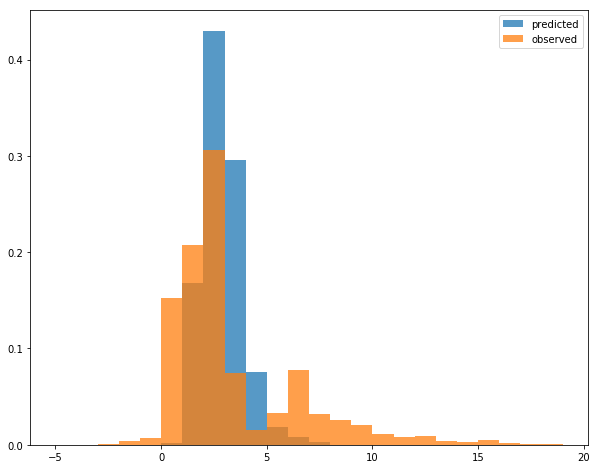

In [26]:
plt.figure(figsize=(10, 8))
plt.hist(pd.Series(lush_y_pred_full), bins=range(-5,20), alpha=0.75, density=True, label='predicted')
plt.hist(pd.Series(y.ravel()), bins=range(-5,20), alpha=0.75, density=True, label='observed')
plt.legend()
plt.show()

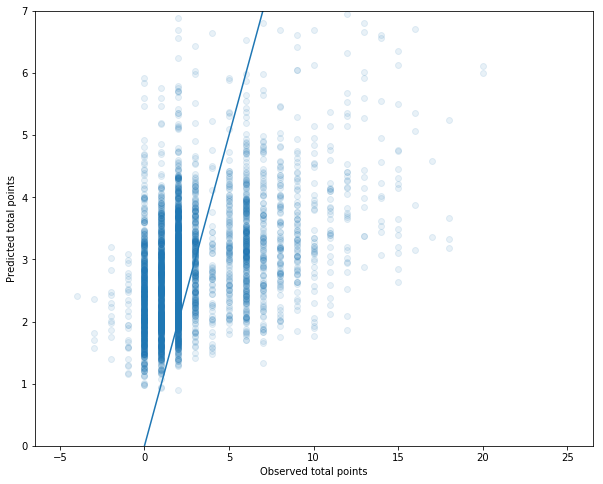

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(pd.Series(y.ravel()), pd.Series(lush_y_pred_full), alpha=0.1)
plt.plot(np.linspace(-5, 25), np.linspace(-5, 25))
plt.ylabel('Predicted total points')
plt.xlabel('Observed total points')
plt.ylim((0, 7))
plt.show()

## Gradient boosted trees (stark)

In [ ]:
stark_model = GradientBoostingRegressor(n_estimators=172,
                                        max_features=0.71,
                                        min_samples_leaf=0.022,
                                        learning_rate=0.028,
                                        criterion='mse',
                                        random_state=0)
stark_model.fit(stark_X_train_sel, y_train.ravel())

In [ ]:
# get predictions for test set
stark_y_pred = stark_model.predict(stark_X_test_sel).flatten()

# calculate cross entropy loss for test set
stark_test_loss = (
    mean_absolute_error(y_test, stark_y_pred),
    mean_squared_error(y_test, stark_y_pred),
    r2_score(y_test, stark_y_pred)
)
stark_test_loss

In [ ]:
pd.Series(stark_y_pred).describe()

In [ ]:
# refit model on all data
stark_model_full = GradientBoostingRegressor(n_estimators=120,
                                             max_features=0.8,
                                             min_samples_leaf=0.02,
                                             learning_rate=0.05,
                                             criterion='mse',
                                             random_state=0)
stark_model_full.fit(stark_X_sel, y.ravel())

In [ ]:
# get predictions for whole set
stark_y_pred_full = stark_model_full.predict(stark_X_sel).flatten()

# calculate cross entropy loss for test set
stark_test_loss_full = (
    mean_absolute_error(y, stark_y_pred_full),
    mean_squared_error(y, stark_y_pred_full),
    r2_score(y, stark_y_pred_full)
)
stark_test_loss_full

In [ ]:
pd.Series(stark_y_pred_full).describe()

In [ ]:
abs(pd.Series(y.ravel()) - pd.Series(stark_y_pred_full)).describe()

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(pd.Series(stark_y_pred_full), bins=range(-5,20), alpha=0.75, density=True, label='predicted')
plt.hist(pd.Series(y.ravel()), bins=range(-5,20), alpha=0.75, density=True, label='observed')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(pd.Series(y.ravel()), pd.Series(stark_y_pred_full), alpha=0.1)
plt.plot(np.linspace(-5, 25), np.linspace(-5, 25))
plt.ylabel('Predicted total points')
plt.xlabel('Observed total points')
plt.ylim((0, 7))
plt.show()

## Summary

In [29]:
pd.DataFrame([
    ('Gradient boosted trees (lush)', lush_test_loss[0], lush_test_loss[1], lush_test_loss[2]),
#     ('Gradient boosted trees (stark)', stark_test_loss[0], stark_test_loss[1], stark_test_loss[2]),
], columns=['model', 'MAE', 'MSE', 'r2'])

,model,MAE,MSE,r2
0,Gradient boosted trees (lush),2.179329,9.453105,0.091643


In [30]:
pd.DataFrame([
    ('Gradient boosted trees (lush)', lush_test_loss_full[0], lush_test_loss_full[1], lush_test_loss_full[2]),
#     ('Gradient boosted trees (stark)', stark_test_loss_full[0], stark_test_loss_full[1], stark_test_loss_full[2]),
], columns=['model', 'MAE', 'MSE', 'r2'])

,model,MAE,MSE,r2
0,Gradient boosted trees (lush),2.035073,7.807749,0.18402
